In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import nfl_data_py as nfl

In [2]:
#accsessing the data and creating the dataframe for qb stats for the model
pbp_data = nfl.import_pbp_data([2019, 2020, 2021, 2022, 2023, 2024])

# Filter for pass plays by QBs
qb_plays = pbp_data[
    (pbp_data['play_type'] == 'pass') & 
    (pbp_data['season_type'] == 'REG') & 
    (pbp_data['passer_player_name'].notna())
].copy()

# Aggregate stats
qb_stats = qb_plays.groupby(['season', 'passer_player_id', 'passer_player_name']).agg({
    'complete_pass': 'sum',
    'interception': 'sum',
    'sack': 'sum',
    'yards_gained': 'sum',
    'pass_touchdown': 'sum',
    'play_type': 'count'
}).rename(columns={
    'play_type': 'attempts',
    'pass_touchdown': 'passing_tds',
    'passer_player_name': 'player_name'
}).reset_index()

# Same calculations as above
qb_stats['comp_pct'] = round(qb_stats['complete_pass'] / qb_stats['attempts'] * 100, 1)
qb_stats['ypa'] = round(qb_stats['yards_gained'] / qb_stats['attempts'], 1)
qb_stats['td_int_ratio'] = round(qb_stats['passing_tds'] / (qb_stats['interception'] + 1), 2)
qb_stats['td_rate'] = round(qb_stats['passing_tds'] / qb_stats['attempts'], 3)
qb_stats['int_rate'] = round(qb_stats['interception'] / qb_stats['attempts'], 3)

print(qb_stats.sort_values('yards_gained', ascending=False).head(10))

2019 done.
2020 done.
2021 done.
2022 done.
2023 done.
2024 done.
Downcasting floats.
     season passer_player_id passer_player_name  complete_pass  interception  \
232    2021       00-0019596            T.Brady          485.0          12.0   
407    2022       00-0033873          P.Mahomes          435.0          12.0   
55     2019       00-0031503          J.Winston          380.0          30.0   
343    2021       00-0036355          J.Herbert          443.0          15.0   
66     2019       00-0033077         D.Prescott          388.0          11.0   
299    2021       00-0033873          P.Mahomes          436.0          13.0   
244    2021       00-0026498         M.Stafford          404.0          17.0   
655    2024       00-0036442           J.Burrow          460.0           9.0   
184    2020       00-0033873          P.Mahomes          390.0           6.0   
268    2021       00-0031280             D.Carr          428.0          14.0   

     sack  yards_gained  passing_

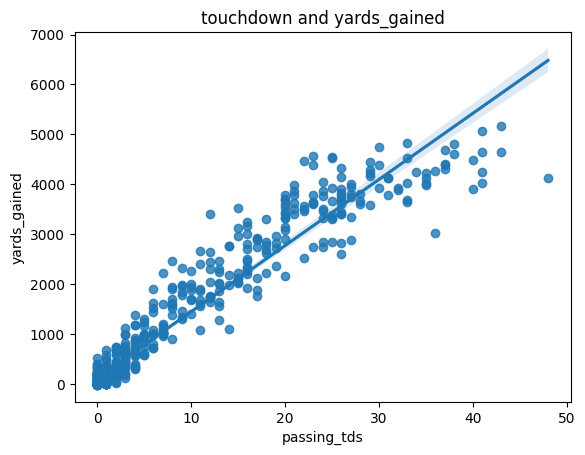

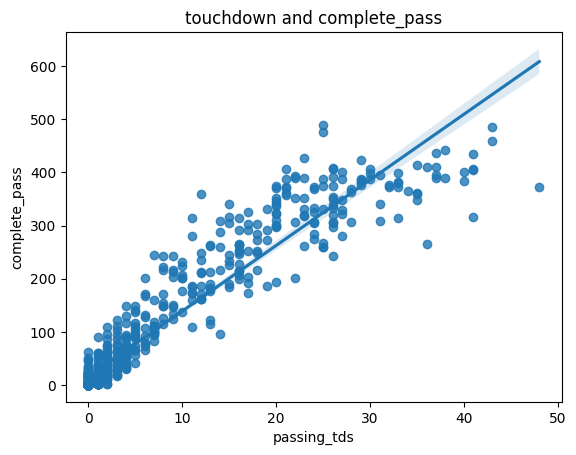

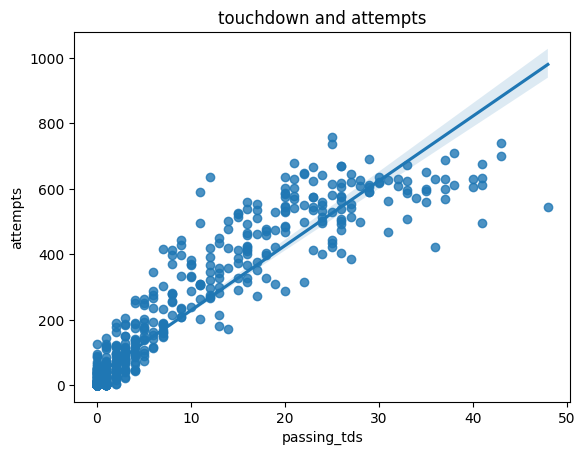

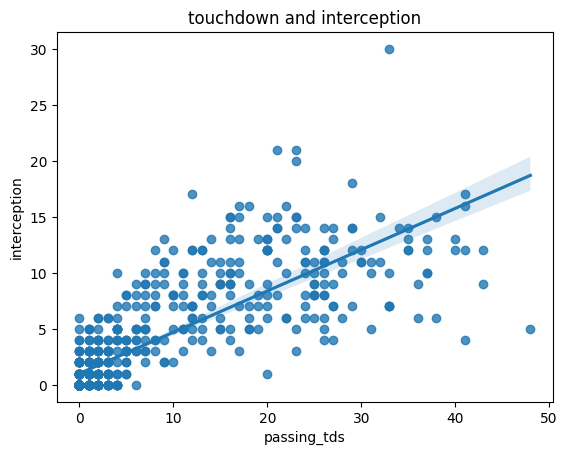

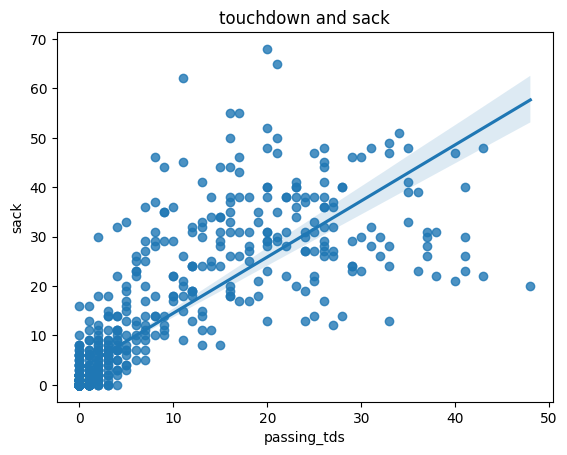

In [3]:
# Plotting the data and seeing the correlation between qb stats and touchdowns thrown
for y in ['yards_gained', 'complete_pass', 'attempts', 'interception', 'sack']:
    sns.regplot(data=qb_stats, x='passing_tds', y=y,)
    plt.title(f"touchdown and {y}")
    plt.show()

In [4]:
#copying the data to create a new column for a predictive model
# This is a simple regression model to predict future performance based on past performance
copy = qb_stats.copy()
copy['season'] = copy['season'].add(1)

new_qb_stats = (qb_stats.merge(copy, on = ['season',
 'passer_player_id', 'passer_player_name'], suffixes=('', '_prev'), how='left'))
new_qb_stats.sample(10)

,season,passer_player_id,passer_player_name,complete_pass,interception,sack,yards_gained,passing_tds,attempts,comp_pct,...,interception_prev,sack_prev,yards_gained_prev,passing_tds_prev,attempts_prev,comp_pct_prev,ypa_prev,td_int_ratio_prev,td_rate_prev,int_rate_prev
119,2020,00-0024417,S.Koch,1.0,0.0,0.0,15.0,0.0,1,100.0,...,0.0,0.0,-2.0,0.0,1.0,100.0,-2.0,0.0,0.000,0.000
153,2020,00-0031260,L.Thomas,1.0,0.0,0.0,28.0,0.0,1,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,2022,00-0033119,J.Brissett,236.0,6.0,24.0,2448.0,12.0,391,60.4,...,4.0,19.0,1153.0,5.0,244.0,57.8,4.7,1.0,0.020,0.016
494,2023,00-0032268,M.Mariota,15.0,1.0,3.0,153.0,1.0,26,57.7,...,9.0,28.0,2028.0,15.0,326.0,56.4,6.2,1.5,0.046,0.028
161,2020,00-0031800,T.Heinicke,12.0,0.0,1.0,130.0,1.0,20,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,2019,00-0034860,D.Pettis,1.0,0.0,0.0,16.0,0.0,1,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,2019,00-0032268,M.Mariota,95.0,2.0,25.0,1041.0,7.0,183,51.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
381,2022,00-0031503,J.Winston,73.0,5.0,11.0,786.0,4.0,125,58.4,...,3.0,11.0,1101.0,14.0,172.0,55.2,6.4,3.5,0.081,0.017
145,2020,00-0030151,T.Bray,1.0,0.0,0.0,18.0,0.0,4,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,2021,00-0033733,G.Ward,1.0,0.0,0.0,2.0,0.0,2,50.0,...,0.0,0.0,15.0,0.0,1.0,100.0,15.0,0.0,0.000,0.000


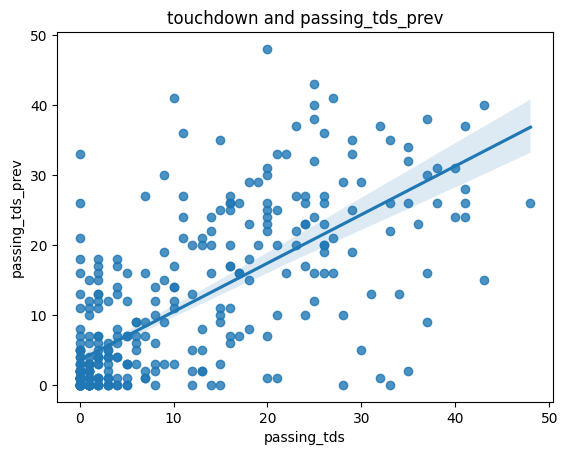

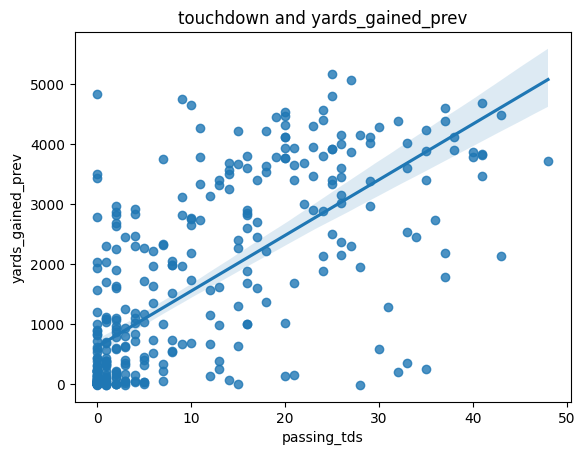

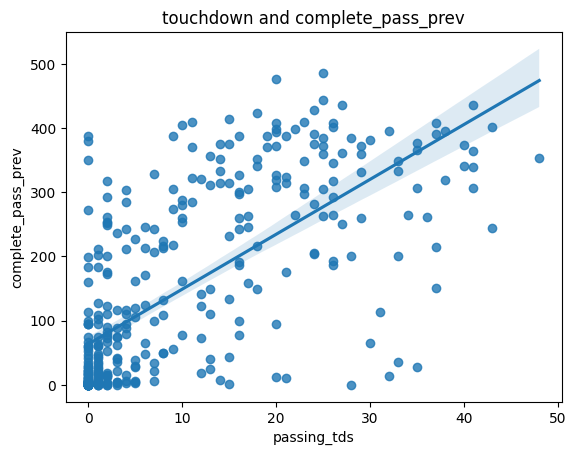

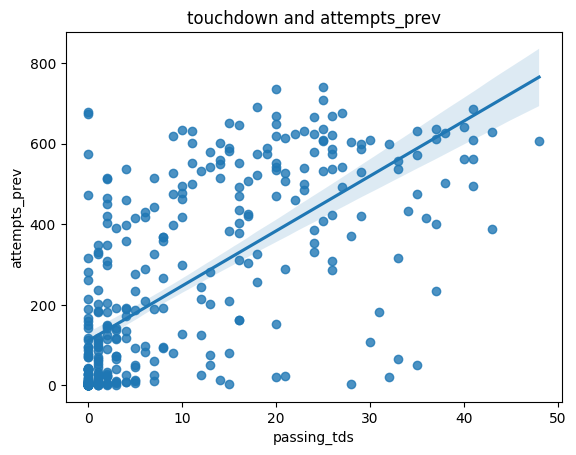

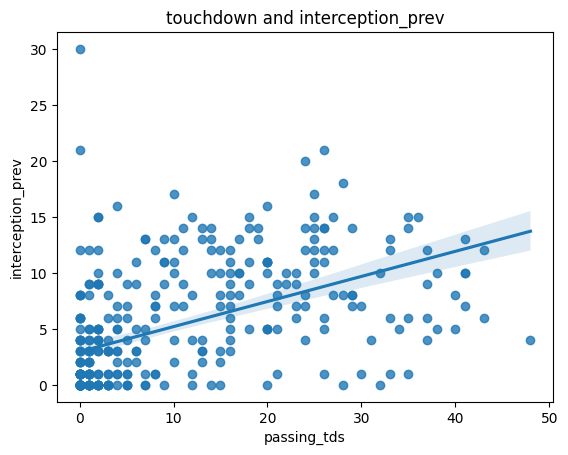

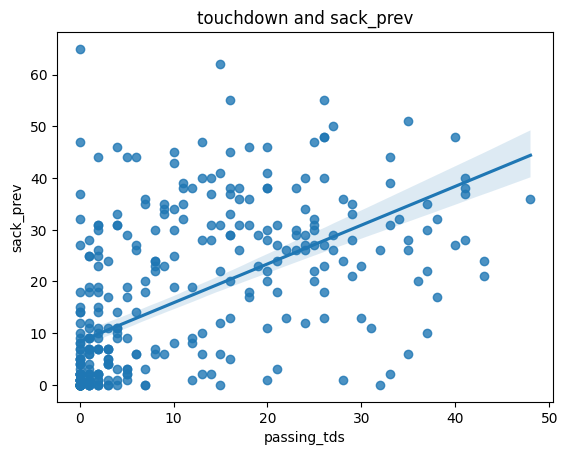

In [5]:
#plotting the data and seeing the correlation between previous qb stats and touchdowns thrown in the current season
for y in ['passing_tds_prev','yards_gained_prev', 'complete_pass_prev', 'attempts_prev', 'interception_prev', 'sack_prev']:
    sns.regplot(data=new_qb_stats, x='passing_tds', y=y,)
    plt.title(f"touchdown and {y}")
    plt.show()

# using the model to Predict 2022 Passing Touchdowns

In [6]:
#loading in the machine learning model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

#training the model
features = ['passing_tds_prev','yards_gained_prev', 'complete_pass_prev', 'td_rate_prev',
             'interception_prev', 'int_rate_prev', 'ypa_prev', 'sack_prev', 'comp_pct_prev']
target = 'passing_tds'

# Creating a subset with no null values (especially for _prev columns)
model_data = new_qb_stats.dropna(subset=features + [target]).copy() # Use .copy() for better code practice

#train on 2021 data
train_data = (model_data.loc[model_data['season'] < 2022])

#test on 2022 data
test_data = (model_data.loc[model_data['season']==2022])

#creating the model and fitting it to the training data
model=LinearRegression()
model.fit(train_data.loc[:, features], train_data[target])

#predicting the test data
predictions = model.predict(test_data.loc[:, features])

predictions = pd.Series(predictions, index=test_data.index)

test_data = test_data.copy()  
test_data.loc[:, 'predictions'] = predictions  

#running some statistics on the model to see how well it performed
rmse = mean_squared_error(test_data[target], test_data['predictions'])**0.5
r2 = pearsonr(test_data[target], test_data['predictions'])[0]**2
print(f"rmse: {rmse}\nr2: {r2}")

rmse: 6.897660353418814
r2: 0.6041644615775007


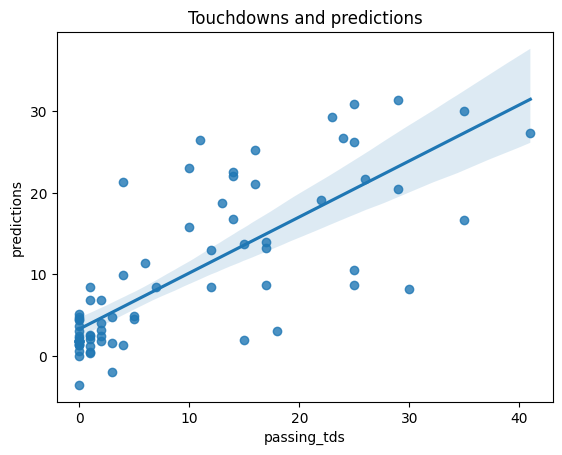

In [7]:
#visualizing the results
sns.regplot(data=test_data, x=target, y='predictions')
plt.title("Touchdowns and predictions")
plt.show()

In [8]:
# Plotting the top 10 actual touchdowns vs predictions
test_data.loc[:, ['season', 'passer_player_id', 'passer_player_name', target, 'predictions']].sort_values(target, ascending=False).head(10)

,season,passer_player_id,passer_player_name,passing_tds,predictions
407,2022,00-0033873,P.Mahomes,41.0,27.292628
449,2022,00-0036442,J.Burrow,35.0,30.068555
421,2022,00-0034857,J.Allen,35.0,16.678271
376,2022,00-0030565,G.Smith,30.0,8.182066
373,2022,00-0029604,K.Cousins,29.0,31.366783
395,2022,00-0033106,J.Goff,29.0,20.452018
358,2022,00-0023459,A.Rodgers,26.0,21.648426
356,2022,00-0019596,T.Brady,25.0,30.946722
456,2022,00-0036971,T.Lawrence,25.0,8.739041
445,2022,00-0036355,J.Herbert,25.0,26.190952


# aggregating career totals to increase the accuracy of the model

In [9]:
# Sort by player and season to ensure correct cumulative calculation
qb_stats_sorted = qb_stats.sort_values(['passer_player_id', 'season'])

# Define the raw stats columns for which we want to calculate cumulative previous season totals
raw_stats_to_accumulate = [
    'complete_pass', 'interception', 'sack',
    'yards_gained', 'passing_tds', 'attempts'
]

# Create a new DataFrame based on the sorted qb_stats
new_qb_stats_career_prev = qb_stats_sorted.copy()

# --- Calculate cumulative sums of raw stats for all PREVIOUS seasons ---
# Group by player, calculate cumulative sum, then shift by 1 to get the sum of all prior seasons
for col in raw_stats_to_accumulate:
    cumulative_col_name = f'{col}_career_cumulative'
    # Calculate cumulative sum up to and including the current season
    new_qb_stats_career_prev[cumulative_col_name] = new_qb_stats_career_prev.groupby('passer_player_id')[col].cumsum()
    # Shift to get the sum of all seasons *before* the current one
    new_qb_stats_career_prev[f'{col}_prev'] = new_qb_stats_career_prev.groupby('passer_player_id')[cumulative_col_name].shift(1)
    # Drop the intermediate cumulative column
    new_qb_stats_career_prev.drop(columns=[cumulative_col_name], inplace=True)


# --- Calculate derived _prev stats based on the aggregated _prev raw stats ---
# For a player's first season, these _prev stats will be NaN, which is appropriate.

# comp_pct_prev
new_qb_stats_career_prev['comp_pct_prev'] = round(
    new_qb_stats_career_prev['complete_pass_prev'] / new_qb_stats_career_prev['attempts_prev'] * 100, 1
)

# ypa_prev
new_qb_stats_career_prev['ypa_prev'] = round(
    new_qb_stats_career_prev['yards_gained_prev'] / new_qb_stats_career_prev['attempts_prev'], 1
)

# td_int_ratio_prev (adding 1 to interception_prev in denominator to match original logic)
new_qb_stats_career_prev['td_int_ratio_prev'] = round(
    new_qb_stats_career_prev['passing_tds_prev'] / (new_qb_stats_career_prev['interception_prev'] + 1), 2
)

# td_rate_prev
new_qb_stats_career_prev['td_rate_prev'] = round(
    new_qb_stats_career_prev['passing_tds_prev'] / new_qb_stats_career_prev['attempts_prev'], 3
)

# int_rate_prev
new_qb_stats_career_prev['int_rate_prev'] = round(
    new_qb_stats_career_prev['interception_prev'] / new_qb_stats_career_prev['attempts_prev'], 3
)

# Display a sample of the new DataFrame
# The columns for _prev stats will be NaN for the first season of each player
new_qb_stats_career_prev.sample(10)

,season,passer_player_id,passer_player_name,complete_pass,interception,sack,yards_gained,passing_tds,attempts,comp_pct,...,interception_prev,sack_prev,yards_gained_prev,passing_tds_prev,attempts_prev,comp_pct_prev,ypa_prev,td_int_ratio_prev,td_rate_prev,int_rate_prev
692,2024,00-0039732,B.Nix,376.0,12.0,24.0,3577.0,29.0,591,63.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
697,2024,00-0039917,M.Penix,61.0,3.0,4.0,761.0,3.0,109,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,2021,00-0034418,C.Wilson,3.0,0.0,0.0,88.0,0.0,3,100.0,...,0.0,0.0,23.0,1.0,2.0,100.0,11.5,1.00,0.500,0.000
563,2023,00-0037077,S.Howell,388.0,21.0,65.0,3499.0,21.0,679,57.1,...,1.0,3.0,158.0,1.0,22.0,50.0,7.2,0.50,0.045,0.045
225,2020,00-0036320,J.Charlton,1.0,0.0,1.0,23.0,0.0,2,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
631,2024,00-0034577,K.Allen,1.0,0.0,0.0,19.0,0.0,1,100.0,...,21.0,60.0,3981.0,24.0,739.0,57.0,5.4,1.09,0.032,0.028
644,2024,00-0035685,D.Montgomery,1.0,0.0,0.0,3.0,1.0,1,100.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.000,1.000
502,2023,00-0033275,P.Walker,54.0,5.0,11.0,584.0,1.0,121,44.6,...,11.0,18.0,1339.0,5.0,246.0,53.3,5.4,0.42,0.020,0.045
441,2022,00-0036264,J.Love,14.0,0.0,0.0,195.0,1.0,20,70.0,...,3.0,3.0,388.0,2.0,66.0,54.5,5.9,0.50,0.030,0.045
160,2020,00-0031503,J.Winston,7.0,0.0,2.0,64.0,0.0,13,53.8,...,30.0,47.0,4831.0,33.0,674.0,56.4,7.2,1.06,0.049,0.045


# Using the model to predict 2024 Passing Touchdowns

In [10]:
# Then, use qb_stats_career_prev to create model_data
model_data = new_qb_stats_career_prev.dropna(subset=features + [target]).copy()

# Train on all data prior to 2024
train_data = model_data[model_data['season'] < 2024].copy()

# Test on 2024 data
test_data = model_data[model_data['season'] == 2024].copy()

#creating the model and fitting it to the training data
model=LinearRegression()
model.fit(train_data.loc[:, features], train_data[target])

#predicting the test data
predictions = model.predict(test_data.loc[:, features])

predictions = pd.Series(predictions, index=test_data.index)

test_data = test_data.copy()  
test_data.loc[:, 'predictions'] = predictions  

#running some statistics on the model to see how well it performed
rmse = mean_squared_error(test_data[target], test_data['predictions'])**0.5
r2 = pearsonr(test_data[target], test_data['predictions'])[0]**2
print(f"rmse: {rmse}\nr2: {r2}")

rmse: 9.063030636560459
r2: 0.4799822221594603


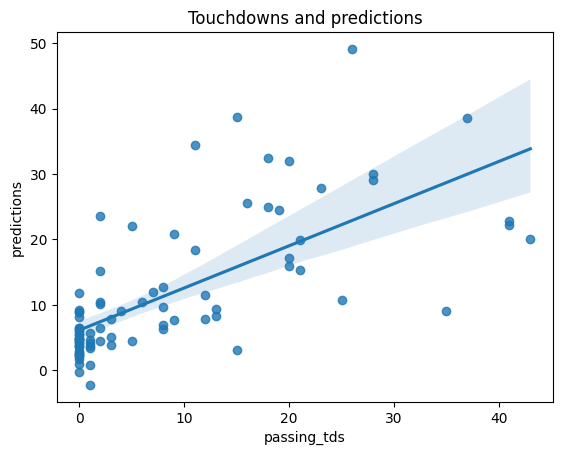

In [11]:
#visualizing the results
sns.regplot(data=test_data, x=target, y='predictions')
plt.title("Touchdowns and predictions")
plt.show()

In [12]:
# Plotting the top 10 actual touchdowns vs predictions
test_data.loc[:, ['season', 'passer_player_name', target, 'predictions']].sort_values(target, ascending=False).head(10)

,season,passer_player_name,passing_tds,predictions
655,2024,J.Burrow,43.0,19.986695
636,2024,B.Mayfield,41.0,22.176500
633,2024,L.Jackson,41.0,22.828941
614,2024,J.Goff,37.0,38.515836
638,2024,S.Darnold,35.0,9.043166
589,2024,A.Rodgers,28.0,29.930193
637,2024,J.Allen,28.0,29.013025
622,2024,P.Mahomes,26.0,49.134306
650,2024,J.Love,25.0,10.771253
653,2024,J.Herbert,23.0,27.884147


# Predicting 2025 Passing Touchdowns

In [13]:
# Then, use qb_stats_career_prev to create model_data
model_data = new_qb_stats_career_prev.dropna(subset=features + [target]).copy()

# Train on all data prior to 2024
train_data = model_data[model_data['season'] <= 2024].copy()

#creating the model and fitting it to the training data
model=LinearRegression()
model.fit(train_data.loc[:, features], train_data[target])

#predicting the test data
predictions = model.predict(test_data.loc[:, features])

predictions = pd.Series(predictions, index=test_data.index)

test_data = test_data.copy()  
test_data.loc[:, 'predictions'] = predictions  

# For the sake of relavance removing players that I know will probably not start/play in 2025 
players_to_remove = ['D.Carr', 'A.Rodgers', 'K.Cousins']

test_data = test_data[~test_data['passer_player_name'].isin(players_to_remove)]

# Plotting the top 10 predictions for the 2025 NFL Season
test_data.loc[:, ['passer_player_name', 'predictions']].sort_values('predictions', ascending=False).head(10)

,passer_player_name,predictions
622,P.Mahomes,42.726219
614,J.Goff,32.307018
613,D.Prescott,30.746058
592,M.Stafford,29.166806
637,J.Allen,26.980170
596,R.Wilson,26.454792
653,J.Herbert,24.639838
633,L.Jackson,22.898549
654,J.Hurts,22.247995
649,T.Tagovailoa,21.662463
